In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import random
import time
from functools import partial
from helperFunctions import *
from smallestEnclosingCircle import make_circle

#### Data Exploration with CRC Orion Multiplex Features
Sample used for EDA: P37_S49-CRC17

In [2]:
# Load data containing IFM2 markers
ifm2_data = pd.read_csv('/Users/emmadyer/Desktop/michor_lab/orion_data/P37_S49-CRC17_ifm2.csv')

In [6]:
# Set the aesthetic style of the plots
sns.set_theme(style='darkgrid')

# Create the subplot axes
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Iterate over the columns and plot the barplots
for i, col_name in enumerate(['CD45', 'CD4', 'SMA', 'PD-L1']):
    row = i // 2
    col = i % 2

    # Sort the DataFrame based on the column of interest in descending order
    sorted_data = ifm2_data.sort_values(by=col_name, ascending=False)

    # Reset the index to get a new sequential index
    sorted_data.reset_index(drop=True, inplace=True)

    # Plot the data using the new index as the x-axis
    # The y-axis will be the values from the column of interest
    sorted_data[col_name].plot(kind='bar', ax=axes[row, col])

    # Optionally, set the x-axis label to something more meaningful
    axes[row, col].set_xlabel('Rank')

    # Set the y-axis label to the column name for clarity
    axes[row, col].set_ylabel(col_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

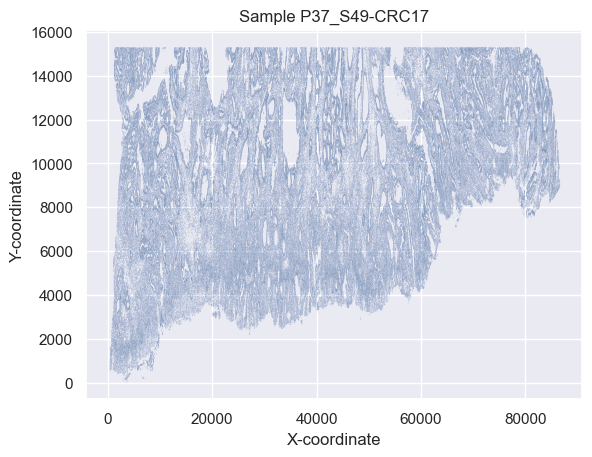

In [12]:
# Plot cell coordinates just to get an idea of the data
cell_coords = pd.read_csv('/Users/emmadyer/Desktop/michor_lab/orion_data/P37_S49-CRC17_xy_only.csv')
# Remove "Unnamed" columns from the DataFrame
cell_coords = cell_coords.loc[:, ~cell_coords.columns.str.contains('^Unnamed')]

# Plotting
sns.set_theme(style='darkgrid')  # Set the aesthetic style of the plots
sns.scatterplot(data=cell_coords, x='X_centroid', y='Y_centroid', s=0.025)  # Plot points
plt.xlabel('X-coordinate')  # Optional: Set the x-axis label
plt.ylabel('Y-coordinate')  # Optional: Set the y-axis label
plt.title('Sample P37_S49-CRC17')  # Optional: Set the plot title
plt.show()

#plt.savefig('/Users/emmadyer/Desktop/michor_lab/orion_data/figures/all_points.png', dpi=300)

In [18]:
# Calculate the grid indices for each cell
cell_coords['X_grid'] = (cell_coords['X_centroid'] // 2000).astype(int)
cell_coords['Y_grid'] = (cell_coords['Y_centroid'] // 2000).astype(int)

# Group the cells by grid indices
grid_groups = cell_coords.groupby(['X_grid', 'Y_grid'])

# Create a dictionary to store the individual grid dataframes
grid_dataframes = {}

# Iterate over the grid groups and create individual dataframes
for (x, y), group in grid_groups:
    if len(group) > 0:  # Check if there are points in the grid
        grid_dataframes[(x, y)] = group.drop(['X_grid', 'Y_grid'], axis=1)

# Access the individual grid dataframes using the grid indices as keys
# For example, to access the dataframe for grid (0, 0):
grid_0_0 = grid_dataframes[(0, 0)]
print(grid_0_0)

print(grid_dataframes.keys())

       CellID   X_centroid   Y_centroid
284       285  1686.455078   402.611328
294       295  1758.137417   412.493378
301       302  1734.203267   421.513612
309       310  1985.856164   427.107306
317       318  1955.702163   434.161398
...       ...          ...          ...
14696   14697   609.557093  1998.173010
14697   14698  1483.843636  1995.992727
14719   14720  1065.864486  1998.163551
14729   14730   971.689655  1998.572414
14743   14744   988.101124  1997.550562

[3105 rows x 3 columns]
dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 

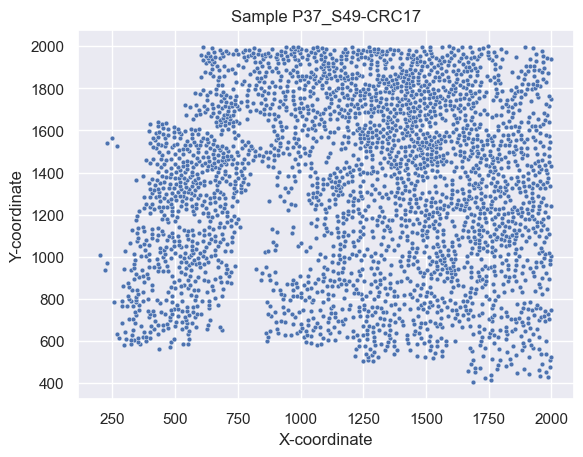

In [19]:
# Plot a single ROI

# Plotting
sns.set_theme(style='darkgrid')  # Set the aesthetic style of the plots
sns.scatterplot(data=grid_0_0, x='X_centroid', y='Y_centroid', s=12)  # Plot points
plt.xlabel('X-coordinate')  # Optional: Set the x-axis label
plt.ylabel('Y-coordinate')  # Optional: Set the y-axis label
plt.title('Sample P37_S49-CRC17')  # Optional: Set the plot title
plt.show()